### Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

### Fico Score Range

![Alt Text](https://raw.githubusercontent.com/imamfirdaus-if/kasbaik/main/machine-learning/models/credit-scoring/fico-score-range.png?token=GHSAT0AAAAAABSMKRBXBRLCGJM4FZSTSVYYYVIAIWA)

### Variables

**Usia** : 21 s/d 100
 - 1 : >64
 - 2 : 21 - 64

**Econ**  
 - 5 : econ >= 200000
 - 4 : 1500000 <=  econ < 1999999
 - 3 : 1000000 <= econ < 1499999
 - 2 : 500000 <=  econ < 999999
 - 1 : 10000 <=  econ  < 499999
 - 0 : econ <= 10000
 
**Pekerjaan** 
 - 1 : Wirausaha/ Pedagang/ Pekerja Lepas
 - 2 : Buruh/Guru/Dosen

**Peminjaman ke-** 
 - 1 : 1 
 - 2 : 2- 3 
 - 3 : > 3
 
**Hari telat bayar** 
 - 0 : tidak pernah 
 - 1 : < 1 minggu 
 - 2 : 2 - 4 minggu 
 - 3 : > 4 minggu
 
**Pernah Donasi** 
 - 0 : tidak pernah 
 - 1 : 1 - 3
 - 2 : 3- 5
 - 3 : >= 6

### Open Dataset

In [2]:
with open("./dataset credit-scoring/Dummy Datasets FICO Scoring - V41 - Final.csv", 'r') as csvfile:
    print(f"First line (header) looks like this:\n\n{csvfile.readline()}")
    print(f"Each data point looks like this:\n\n{csvfile.readline()}")

First line (header) looks like this:

,usia,econ,pekerjaan,pinjaman ke,telat bayar,donasi,score

Each data point looks like this:

0,2.0,5.0,2.0,3.0,0.0,3.0,849.969



In [3]:
data  = pd.read_csv(r'./dataset credit-scoring/Dummy Datasets FICO Scoring - V41 - Final.csv', delimiter=',')
data = data.drop(columns=['Unnamed: 0'])
data.head()

,usia,econ,pekerjaan,pinjaman ke,telat bayar,donasi,score
0,2.0,5.0,2.0,3.0,0.0,3.0,849.969
1,1.0,0.0,1.0,1.0,3.0,0.0,110.833
2,1.0,0.0,1.0,2.0,2.0,3.0,324.136
3,2.0,5.0,1.0,2.0,1.0,2.0,657.896
4,2.0,5.0,2.0,2.0,2.0,1.0,664.156


## Data Preprocessing

### Splitting labels and features

In [4]:
features = data.drop(columns=['score'])
label = data[['score']]

print(features.shape)
print(label.shape)

features.columns, label.columns

(10000, 6)
(10000, 1)


(Index(['usia', 'econ', 'pekerjaan', 'pinjaman ke', 'telat bayar', 'donasi'], dtype='object'),
 Index(['score'], dtype='object'))

### Check Data Type
Customize the data type according to the given metadata

- **Categorical** (age, profession, loan number, late payment, donation)
- **Numeric** (loan amount, tenor, income, dependents)

In [5]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB


In [6]:
col_cat_label = ['score']
label[col_cat_label] = label[col_cat_label].astype('int64')
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   score   10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


C:\Users\farid\AppData\Local\Temp\ipykernel_19612\3633695273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[col_cat_label] = label[col_cat_label].astype('int64')


In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   usia         10000 non-null  float64
 1   econ         10000 non-null  float64
 2   pekerjaan    10000 non-null  float64
 3   pinjaman ke  10000 non-null  float64
 4   telat bayar  10000 non-null  float64
 5   donasi       10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


In [8]:
col_cat_features = ['usia' , 'econ' , 'pekerjaan' , 'pinjaman ke' , 'telat bayar' , 'donasi' ]

features[col_cat_features] = features[col_cat_features].astype('int64')
features[col_cat_features] = features[col_cat_features].astype('category')

### Normalize Data

In [9]:
mx = MinMaxScaler()

col_features = ['usia' , 'econ' , 'pekerjaan' , 'pinjaman ke' , 'telat bayar' , 'donasi' ]

features[col_features] = mx.fit_transform(features[col_features])
features.head(5)

,usia,econ,pekerjaan,pinjaman ke,telat bayar,donasi
0,1.0,1.0,1.0,1.0,0.000000,1.000000
1,0.0,0.0,0.0,0.0,1.000000,0.000000
2,0.0,0.0,0.0,0.5,0.666667,1.000000
3,1.0,1.0,0.0,0.5,0.333333,0.666667
4,1.0,1.0,1.0,0.5,0.666667,0.333333


### Split Into Train and Test

In [10]:
X_train, X_validate, y_train, y_validate = train_test_split(
    features, label, test_size=0.3, shuffle=True)

In [11]:
print(X_train.shape)
print(y_train.shape)

print(X_validate.shape)
print(y_validate.shape)

(7000, 6)
(7000, 1)
(3000, 6)
(3000, 1)


In [12]:
X_train = np.array(X_train, dtype='float32')
X_validate = np.array(X_validate, dtype='float32')

y_train = np.array(y_train, dtype='float32')
y_validate = np.array(y_validate, dtype='float32')

## Create TF Model

In [13]:
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(units=1, input_shape=[6], activation='linear'),
    tf.keras.layers.Dense(10, activation="linear", input_shape=X_train[0].shape),
    tf.keras.layers.Dense(1),
    ])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
            loss = tf.keras.losses.MeanAbsoluteError(),
            metrics=['mae'])

In [14]:
mc = ModelCheckpoint('Credit Scoring - V4.h5', monitor='val_mae', mode='min', verbose=1, save_best_only=True)

# Train the model
history = model.fit(X_train, 
                y_train, 
                epochs=100,
                callbacks = [mc],
                validation_data=(X_validate, y_validate))

Epoch 1/100
209/219 [===========================>..] - ETA: 0s - loss: 522.6552 - mae: 522.6552
Epoch 1: val_mae improved from inf to 516.88635, saving model to Credit Scoring - V4.h5
219/219 [==============================] - 2s 4ms/step - loss: 522.0554 - mae: 522.0554 - val_loss: 516.8864 - val_mae: 516.8864
Epoch 2/100
210/219 [===========================>..] - ETA: 0s - loss: 512.3580 - mae: 512.3580
Epoch 2: val_mae improved from 516.88635 to 502.07095, saving model to Credit Scoring - V4.h5
219/219 [==============================] - 1s 3ms/step - loss: 511.9102 - mae: 511.9102 - val_loss: 502.0710 - val_mae: 502.0710
Epoch 3/100
209/219 [===========================>..] - ETA: 0s - loss: 492.5665 - mae: 492.5665
Epoch 3: val_mae improved from 502.07095 to 477.20761, saving model to Credit Scoring - V4.h5
219/219 [==============================] - 1s 4ms/step - loss: 492.0790 - mae: 492.0790 - val_loss: 477.2076 - val_mae: 477.2076
Epoch 4/100
205/219 [===========================>

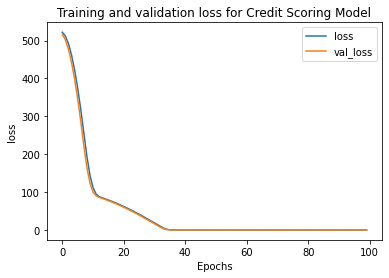

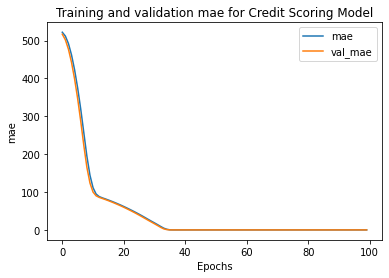

In [15]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.title(f'Training and validation {metric} for Credit Scoring Model')
    plt.show()
    
plot_graphs(history, "loss")
plot_graphs(history, "mae")